<a href="https://colab.research.google.com/github/adityasahu88/ML_PROJECTS/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


**Dataset Description**

- Name: Iris Dataset
- Source: Collected by British biologist and statistician Ronald Fisher in 1936 as an example of linear discriminant analysis.
-Samples: 150 observations (rows)

- Features: 4 features (columns)

- Target Classes: 3 classes of Iris flowers


**Target (Dependent Variable):**
The target variable is a categorical label representing the species of Iris flower:
- Setosa (label: 0)
- Versicolor (label: 1)
- Virginica (label: 2)

**Dataset Structure:**
- Rows (Samples): 150
- 50 samples for each of the three species.
- Columns (Features + Target): 5

4 feature columns + 1 target column.


In [36]:
from os import replace

# Load the Data Set
iris =load_iris()

# Access the features and target
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Class names
target_names = target_names
feature_names = iris.feature_names # Feature names
feature_names =[ column_name.replace(' (cm)','') for column_name in feature_names ]
# COnvert to Dataframe
df =pd.DataFrame(X,columns=feature_names)
df['target']=y


In [37]:

# Load the Dataset with sample 10 records
df.head(10)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:

# Shape of the Dataset
print(df.shape)


(150, 5)


In [39]:

# Describe the Dataset
df.describe()


,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:

# Information about the Dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [41]:

# Check for Missing Values
print(df.isnull().sum())


sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64


In [42]:

# Check for Duplicates
print(df.duplicated().sum())


1


In [43]:

# Check for Class Imbalance
print(df['target'].value_counts())


target
0    50
1    50
2    50
Name: count, dtype: int64


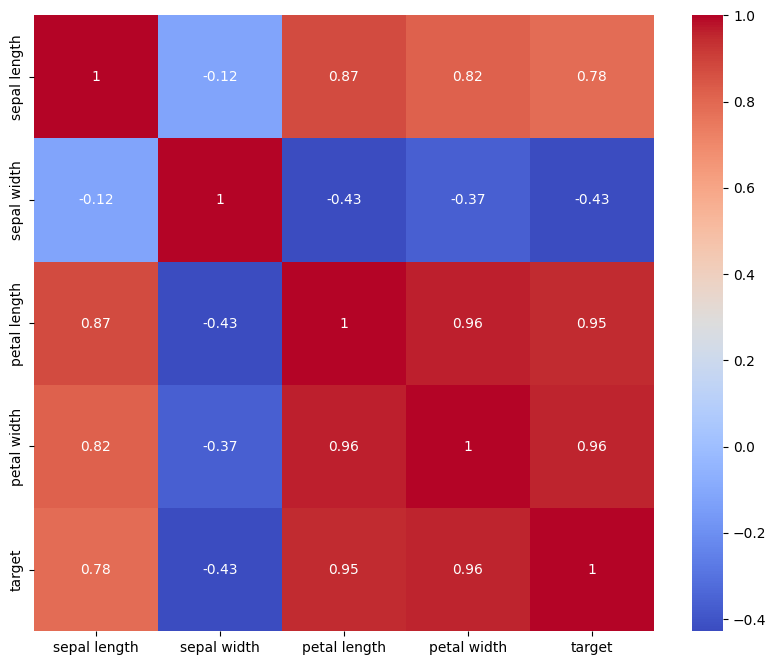

In [44]:
# Lets Visualize the data in for More EDA
# Correlation factor

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()




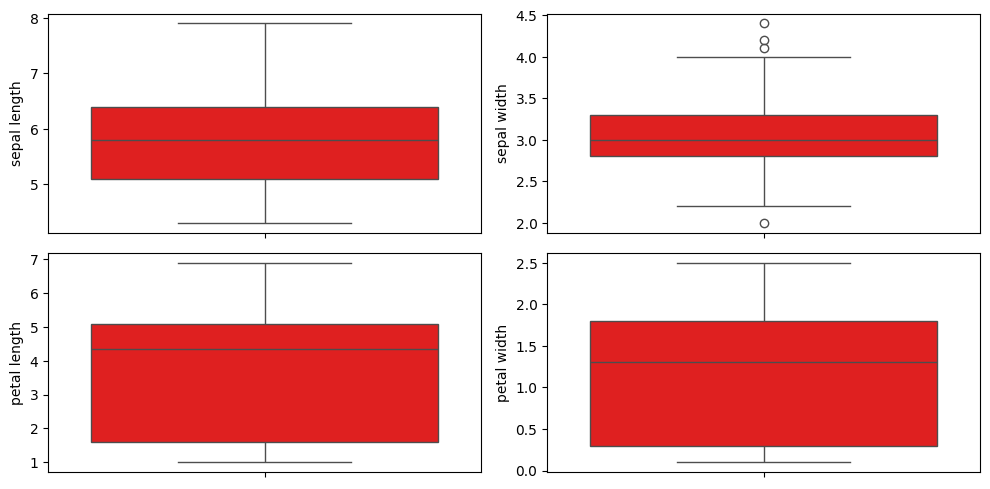

In [45]:
# visual outliers in each features
no_rows=2
no_columns=2
plt.subplots(no_rows,no_columns,figsize=(10,5))
for i,feature in enumerate(feature_names):
  plt.subplot(no_rows,no_columns,i+1)
  sns.boxplot(df[feature],color='red')
plt.tight_layout()
plt.show()

**1. Interquartile Range (IQR) Method**
- The IQR method is one of the most common techniques for detecting outliers.

**Steps:**
- **step 1-**  Calculate the 1st Quartile (Q1): The 25th percentile of the data.
- **Step 2 -** Calculate the 3rd Quartile (Q3): The 75th percentile of the data.
- **Step 3 -** Compute the IQR:
             
             IQR=𝑄3−𝑄1


- **Step 4 -** Define the lower bound and upper bound:
              
               Lower Bound=Q1−1.5×IQR
               Upper Bound=Q3+1.5×IQR


In [46]:
# Let's Break the  Outliers Formula into python Code for each Features
for feature in feature_names:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR =Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  print("********************************")
  print(f"Feature: {feature}")
  print(f"Q1: {Q1}")
  print(f"Q2: {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower Bound: {lower_bound}")
  print(f"Upper Bound: {upper_bound}")

********************************
Feature: sepal length
Q1: 5.1
Q2: 6.4
IQR: 1.3000000000000007
Lower Bound: 3.1499999999999986
Upper Bound: 8.350000000000001
********************************
Feature: sepal width
Q1: 2.8
Q2: 3.3
IQR: 0.5
Lower Bound: 2.05
Upper Bound: 4.05
********************************
Feature: petal length
Q1: 1.6
Q2: 5.1
IQR: 3.4999999999999996
Lower Bound: -3.649999999999999
Upper Bound: 10.349999999999998
********************************
Feature: petal width
Q1: 0.3
Q2: 1.8
IQR: 1.5
Lower Bound: -1.95
Upper Bound: 4.05


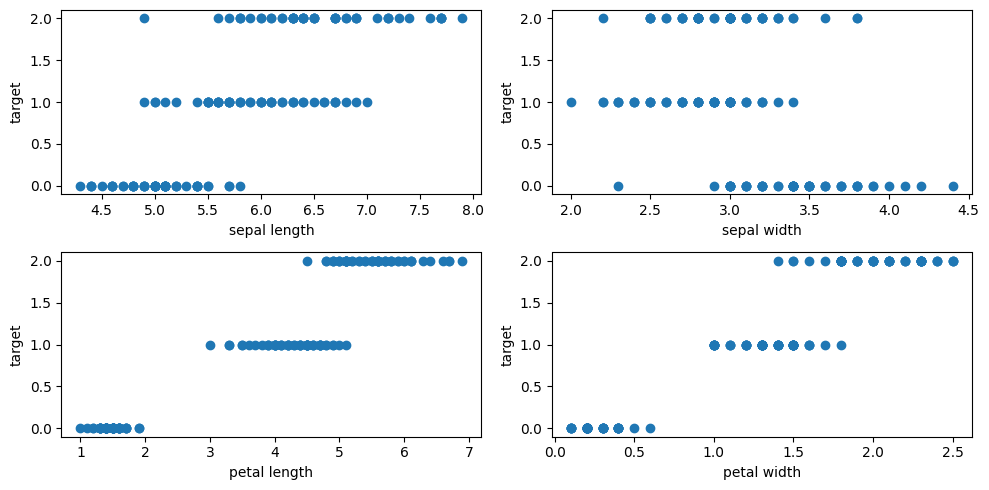

In [47]:
# scatter Plot for each features
no_rows =2
no_columns =2
plt.subplots(no_rows,no_columns,figsize=(10,5))
for i, feature in enumerate(feature_names):
  plt.subplot(no_rows,no_columns,i+1)
  plt.scatter(df[feature],df['target'])
  plt.xlabel(feature)
  plt.ylabel('target')
plt.tight_layout()
plt.show()

**Structure of a Confusion Matrix**
For a binary classification problem, the confusion matrix looks like this:

|  | Predicted  Positive             | Pred Negtive          |
|------------------ |-----------------|-----------------|
| Actual Positive   | True Positive (TP)   | False Negative (FN)   |
| Actual Negative  | False Positive (FP)   | True Negative(TN)    |



**Definitions**
- **True Positive (TP):** Predicted positive, and it's actually positive.
- **True Negative (TN):** Predicted negative, and it's actually negative.
- **False Positive (FP):** Predicted positive, but it's actually negative (Type I error).
- **False Negative (FN):** Predicted negative, but it's actually positive (Type II error).




**Accuracy :**
      
       Accuracy= (TP+TN)/(TP+TN+FP+FN)

**Precision (Positive Predictive Value):**

      Precision=  TP/(TP+FP)

​**Recall :**
   
      Recall = TP/(TP+FN)

**F1 Score:**

       F1 = 2* (Precision * Recall)/(Precision+Recall)


**Decision Tree**

Accuracy on Train Data: 1.0
Accuracy on Test Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



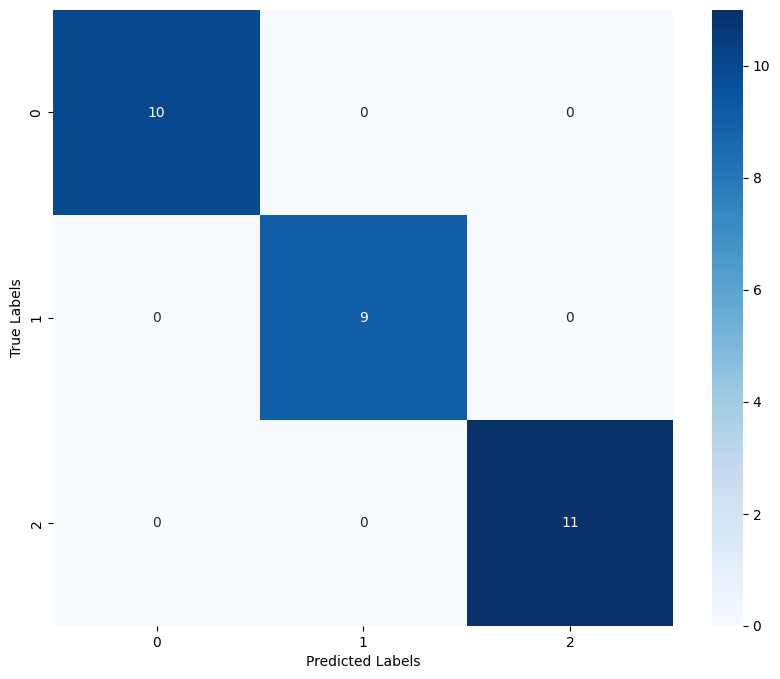

In [48]:
X = df.drop('target',axis=1)
y =df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


model_tree =DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
y_train_pred = model_tree.predict(X_train)

print(f"Accuracy on Train Data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred)}")

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



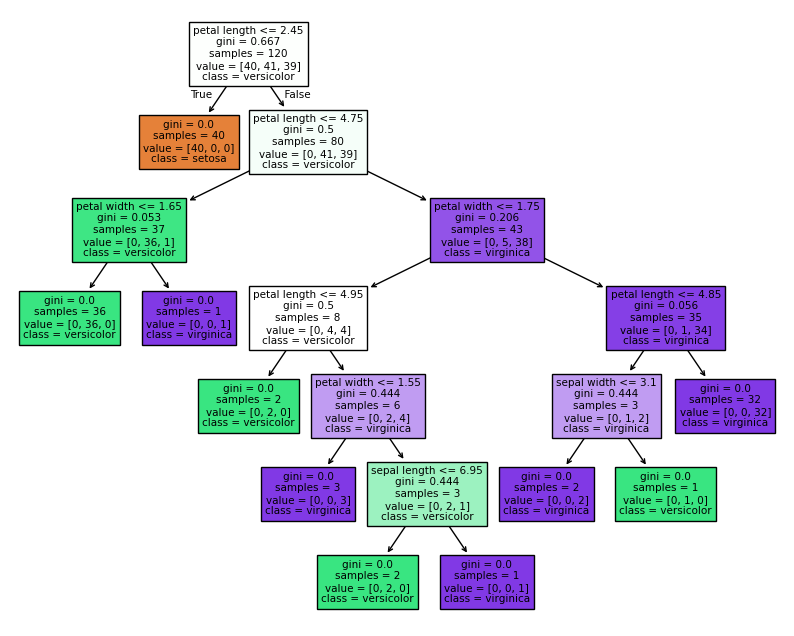

In [49]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(model_tree,filled=True,feature_names=feature_names,class_names=target_names)
plt.show()

`Hyperparameters to be applied in the Decision Tree`


- To perform hyperparameter tuning for a Decision Tree using cross-validation, you can use GridSearchCV from scikit-learn. These methods help us automatically search for the best combination of hyperparameters based on cross-validation.

- **Cross-Validation**
   - Cross-validation is a technique for assessing the performance of a    machine learning model by splitting the dataset into several subsets and training and testing the model on different combinations of these subsets. It helps to avoid overfitting and gives a better estimate of how well the model will perform on unseen data.

   - **K-Fold Cross-Validation:**

     - The data is split into K equal parts (folds).
     - The model is trained on K-1 folds and tested on the remaining fold.
     - This process is repeated K times, each time using a different fold as the test set.
     -The final performance metric is the average of the performance across all folds.
Example: If you use 5-fold cross-validation, the dataset is split into 5 parts. The model is trained 5 times, each time using 4 parts for training and 1 part for testing.

   - **Stratified K-Fold Cross-Validation:**

       - Similar to K-Fold but ensures that each fold has the same distribution of class labels as the full dataset. This is useful for imbalanced datasets where some classes might be underrepresented.



In [50]:
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_model.best_params_)

# Get the best model
best_model = grid_search_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy on test set: 1.0


**Random Forest**

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf_model.best_params_)

# Get the best model
best_model = grid_search_rf_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on test set: 1.0
